In [1]:
import torch
import torch.nn as nn

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [2]:
batch_size    = 100
noise_size    = 296
size = 400
w = 80
dtype         = torch.FloatTensor

def sample_noise(batch_size, dim):
    return (torch.rand([batch_size, dim])*2 - 1).type(dtype)

class Flatten(nn.Module):
    
    def forward(self, x):
        N, C, H, W = x.size()
        return x.view(N, -1)  
    
class Unflatten(nn.Module):
    
    def __init__(self, N=-1, C=128, H=7, W=7):
        super(Unflatten, self).__init__()
        self.N = N
        self.C = C
        self.H = H
        self.W = W
    def forward(self, x):
        return x.view(self.N, self.C, self.H, self.W)

G = nn.Sequential(
            
            nn.Linear(noise_size,1024),
            nn.ReLU(inplace=True),
            nn.BatchNorm1d(1024),
            nn.Linear(1024, 8*w*w),
            nn.ReLU(inplace=True),
            nn.BatchNorm1d(8*w*w),
            Unflatten(batch_size, 128, w // 4, w // 4),
            nn.ConvTranspose2d(128, 64, kernel_size=4, stride=2, padding=1),
            nn.ReLU(inplace=True),
            nn.BatchNorm2d(64),
            nn.ConvTranspose2d(64, 3, kernel_size=4, stride=2, padding=1),
            nn.Tanh(),
            
        ).type(dtype)

In [3]:
device = torch.device('cpu')
G.load_state_dict(torch.load("AnimeGenerator_state_dict.pth", map_location=device))

<All keys matched successfully>

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


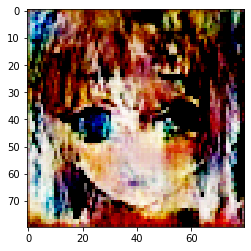

In [6]:
g_fake_seed = sample_noise(batch_size, noise_size)
fake_images = G(g_fake_seed)
plt.imshow(fake_images[21].permute(1, 2, 0).cpu().detach())